In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split,TimeSeriesSplit,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from xgboost import XGBRegressor

from tensorflow import keras
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential



In [65]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [66]:
data = data['Open'].values
data

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [67]:
data = data.reshape(-1,1)
data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [68]:
train = data[:data.shape[0]-50]
test = data[len(train):]

In [69]:
scaller = MinMaxScaler()
train_scaled = scaller.fit_transform(train)

In [70]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps,train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

In [71]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape

(1158, 50)

In [72]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_train.shape

(1158, 50, 1)

In [104]:
model = Sequential()
model.add(LSTM(10,activation='tanh',input_shape=(None,1),return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [105]:
model.fit(X_train,y_train,batch_size=1,epochs=50)

Epoch 1/50
1158/1158 [==============================] - 9s 7ms/step - loss: 0.0051
Epoch 2/50
1158/1158 [==============================] - 8s 6ms/step - loss: 9.5139e-04
Epoch 3/50
1158/1158 [==============================] - 8s 7ms/step - loss: 8.2902e-04
Epoch 4/50
1158/1158 [==============================] - 7s 6ms/step - loss: 6.7420e-04
Epoch 5/50
1158/1158 [==============================] - 8s 7ms/step - loss: 5.7485e-04
Epoch 6/50
1158/1158 [==============================] - 8s 7ms/step - loss: 5.0893e-04
Epoch 7/50
1158/1158 [==============================] - 8s 7ms/step - loss: 4.5236e-04
Epoch 8/50
1158/1158 [==============================] - 8s 7ms/step - loss: 4.1923e-04
Epoch 9/50
1158/1158 [==============================] - 8s 7ms/step - loss: 3.8679e-04
Epoch 10/50
1158/1158 [==============================] - 7s 6ms/step - loss: 3.8348e-04
Epoch 11/50
1158/1158 [==============================] - 7s 6ms/step - loss: 3.6261e-04
Epoch 12/50
1158/1158 [======================

In [106]:
X_test = data[len(data)-len(test)-timesteps:]
X_test_scalled = scaller.transform(X_test)

In [107]:
X_final = []
for i in range(timesteps,X_test_scalled.shape[0]):
    X_final.append(X_test_scalled[i-timesteps:i,0])

In [108]:
X_final = np.array(X_final)
X_final.shape

(50, 50)

In [109]:
X_final = X_final.reshape(X_final.shape[0],X_final.shape[1],1)

In [110]:
X_final.shape

(50, 50, 1)

In [111]:
predict = model.predict(X_final)
normal = scaller.inverse_transform(predict)

2/2 [==============================] - 0s 4ms/step


In [112]:
r2_score(test,normal)

0.6524924257383499

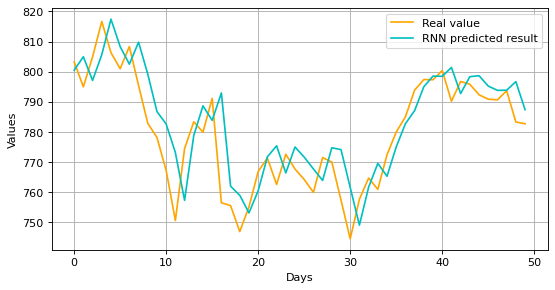

In [113]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(normal,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()